In [1]:
import pandas as pd
import seaborn as sns

### Importing Dataframes

In [2]:
data = './data/census/output-area-classification.csv'
classifier_df = pd.read_csv(data)

In [3]:
data = './data/Deprivation_Index/ID2015_Domains_of_deprivation.xlsx'
dod_df = pd.read_excel(data, sheet_name='ID2015 Domains')

In [4]:
dod_df.head(2)

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,Employment_Rank,Employment_Decile,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
0,E01031349,Adur 001A,E07000223,Adur,21352,7,18992,6,19305,6,13727,5,25876,8,12817,4,28166,9,18367,6
1,E01031350,Adur 001B,E07000223,Adur,8864,3,9233,3,7879,3,6969,3,6883,3,12781,4,11399,4,16242,5


In [5]:
classifier_df.head(2)

,OA11CD,OAC11CD,OAC11NM,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM,FID
0,E00070834,1a2,Established Farming Communities,E01014030,Herefordshire 009D,2b,Prospering countryside life,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11001
1,E00070835,1a2,Established Farming Communities,E01014028,Herefordshire 009B,2a,Ageing rural neighbourhoods,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11002


### Changes to output-area-classification dataframe 
* The columns OA11CD, OAC11CD and OAC11NM are not needed since they are smaller than LSOAs.
* The columns RGN11CD and RGN11NM are regions which are also not needed.
* The columns SOAC11CD and SOAC11NM are not needed.
* the columns LAD17CD, LAD17NM, LACCD and LACNM are not needed since they are duplicated in the deprivation index datasframe.
* The column CTRY11CD is country codes which is also not needed since we are only interested in England.
* FID is not needed.
I will drop all these columns from the dataframe.

In [6]:
classifier_df.drop(columns=['OA11CD', 'OAC11CD', 'OAC11NM', 'RGN11CD', 'RGN11NM', 'SOAC11CD','SOAC11NM', 'LAD17CD', 'LAD17NM', 'LACCD', 'LACNM', 'CTRY11CD', 'FID'], inplace=True)
classifier_df.head(2)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,CTRY11NM
0,E01014030,Herefordshire 009D,E02002913,Herefordshire 009,England
1,E01014028,Herefordshire 009B,E02002913,Herefordshire 009,England


In [7]:
classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227759 entries, 0 to 227758
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   LSOA11CD  227759 non-null  object
 1   LSOA11NM  227759 non-null  object
 2   MSOA11CD  227759 non-null  object
 3   MSOA11NM  227759 non-null  object
 4   CTRY11NM  227759 non-null  object
dtypes: object(5)
memory usage: 8.7+ MB


The dataframe has data for England, Scotland and Wales. We only need England for this study.

In [8]:
classifier_df = classifier_df[classifier_df["CTRY11NM"]=="England"]

In [9]:
# The CTRY11NM column is no longer needed and is removed
classifier_df.drop(columns=["CTRY11NM"], inplace=True)

The dataframe has a lot of duplications.

In [10]:
classifier_df = classifier_df.drop_duplicates()

In [11]:
classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32844 entries, 0 to 173846
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA11CD  32844 non-null  object
 1   LSOA11NM  32844 non-null  object
 2   MSOA11CD  32844 non-null  object
 3   MSOA11NM  32844 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [12]:
# Double check to make sure that the LSOAs are all unique. 
len(classifier_df.LSOA11NM.unique()) == 32844

True

In [13]:
dod_df.loc[dod_df.LSOA_name_2011 == "Herefordshire 009D", :]

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,Employment_Rank,Employment_Decile,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
13000,E01014030,Herefordshire 009D,E06000019,"Herefordshire, County of",18160,6,21009,7,23524,8,28723,9,23652,8,19931,7,1317,1,8819,3


In [14]:
classifier_df.loc[classifier_df.LSOA11NM == "Herefordshire 009D", :]

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM
0,E01014030,Herefordshire 009D,E02002913,Herefordshire 009


In [15]:
# MERGE classififier_df with dod_df
dod_merged = pd.merge(classifier_df, dod_df, left_on="LSOA11CD", right_on="LSOA_code_2011",)

In [16]:
# The columns LSOA11CD and LSOA11NM are no longer needed since they're the same as LSOA_code_20111 and LSOA_name_2011.
dod_merged.drop(columns=["LSOA11CD", "LSOA11NM"], inplace=True)

In [17]:
dod_merged.head(3)

,MSOA11CD,MSOA11NM,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,...,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
0,E02002913,Herefordshire 009,E01014030,Herefordshire 009D,E06000019,"Herefordshire, County of",18160,6,21009,7,...,28723,9,23652,8,19931,7,1317,1,8819,3
1,E02002913,Herefordshire 009,E01014028,Herefordshire 009B,E06000019,"Herefordshire, County of",20409,7,28698,9,...,29666,10,29473,9,26491,9,1379,1,4769,2
2,E02002913,Herefordshire 009,E01014027,Herefordshire 009A,E06000019,"Herefordshire, County of",13424,5,19140,6,...,22405,7,20814,7,30668,10,468,1,2973,1


### Loading census proportions dataframe

In [18]:
data = './data/census/mydata/census_proportions_16_49.csv'
proportions_df = pd.read_csv(data)

In [19]:
proportions_df.head(3)

,MSOA,higher_occupation_25_49,fulltime_students_16_24
0,Darlington 001,13.0,44.0
1,Darlington 002,7.0,40.0
2,Darlington 003,8.0,40.0


Lets now merge the previously merged dod dataframe with the proportions dataframe. With this we will have all the proportions MSOA data for students and occupations linked to their respected LSOAs.

In [20]:
df = pd.merge(proportions_df, dod_merged, left_on="MSOA", right_on="MSOA11NM")
# Will drop these two columns since they're just duplicates.
df.drop(columns=["MSOA11NM", "MSOA11CD"], inplace=True)

In [21]:
 df.head(6)

,MSOA,higher_occupation_25_49,fulltime_students_16_24,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,...,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
0,Darlington 001,13.0,44.0,E01012366,Darlington 001D,E06000005,Darlington,20517,7,21508,...,25324,8,17074,6,26994,9,3336,2,23770,8
1,Darlington 001,13.0,44.0,E01012334,Darlington 001B,E06000005,Darlington,20967,7,30076,...,29055,9,22336,7,13579,5,1890,1,12117,4
2,Darlington 001,13.0,44.0,E01033481,Darlington 001E,E06000005,Darlington,23959,8,29455,...,29294,9,12602,4,8862,3,8198,3,30523,10
3,Darlington 001,13.0,44.0,E01012335,Darlington 001C,E06000005,Darlington,28277,9,28083,...,29737,10,14397,5,29504,9,17316,6,30760,10
4,Darlington 001,13.0,44.0,E01033482,Darlington 001F,E06000005,Darlington,26913,9,26337,...,25114,8,18195,6,26721,9,10133,4,32297,10
5,Darlington 002,7.0,40.0,E01012323,Darlington 002C,E06000005,Darlington,17496,6,15106,...,15230,5,10378,4,13386,5,31536,10,23534,8


## Aggregating the dataset for crime

### Assumptions made here and how it will affect the results going forward.

* I decided to use median instead of mean to aggregate the dataframe.  This was mostly due to the fact that mean is largely influenced by outliers and I wanted my data to be as close to the average as possible.
* Further to this I must add that grouping and aggregating all the LSOAs into one MSOA will reduce the accuracy of the data and therefore the study. Knowing this I still decided to proceed in the hope of finding useful results.
* Finally, I decided to not round the crime decile aggregated results of the mean function and instead keep all decimal instances. The reasoning being that an MSOA with a crime decile of 4.5 has a higher decile than 4 and a lower decile than 5 which I can use during comparisons.

In [22]:
proportions_crime_agg = df.groupby(["MSOA"])[["higher_occupation_25_49", "fulltime_students_16_24", "Crime_Rank", "Crime_Decile"]].median()

In [23]:
proportions_crime_agg.head()

,higher_occupation_25_49,fulltime_students_16_24,Crime_Rank,Crime_Decile
MSOA,,,,
Adur 001,7.0,36.0,13270.0,4.5
Adur 002,12.0,47.0,19925.0,7.0
Adur 003,8.0,52.0,22258.0,7.0
Adur 004,6.0,34.0,10491.0,4.0
Adur 005,13.0,38.0,19712.0,7.0


### Crime and Students
Lets see if there is a relation between the proportion of students(16-24) and crime(ranked) for each MSOA. 

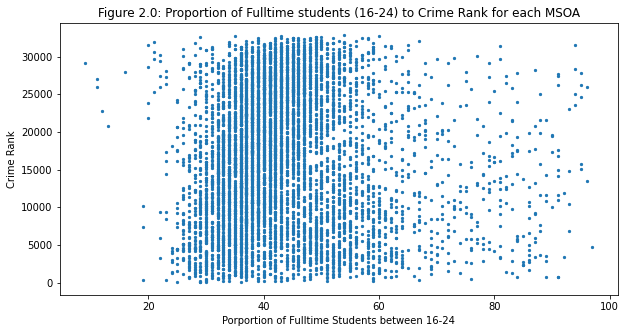

In [26]:
px = proportions_crime_agg.plot.scatter(x="fulltime_students_16_24", y = "Crime_Rank", s = 5, figsize=(10, 5), xlabel="Porportion of Fulltime Students between 16-24", ylabel="Crime Rank", title="Figure 2.0: Proportion of Fulltime students (16-24) to Crime Rank for each MSOA")

/home/hamed/.pyenv/versions/emsx_3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fulltime_students_16_24', ylabel='Crime_Rank'>

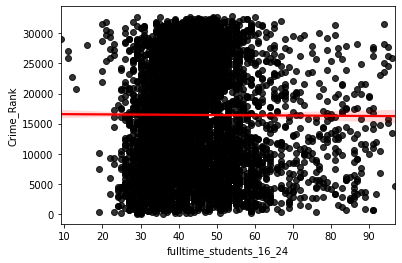

In [28]:
sns.regplot(proportions_crime_agg["fulltime_students_16_24"], proportions_crime_agg["Crime_Rank"], scatter_kws={"color": "black"}, line_kws={"color": "red"})

Result:
Looking at the regression line it seems that there is no signaficant relation between full time students and crime rank. 

### Crime and Higher Professional Occupation
Lets see if there is a relation between the proportion of higher professional occupation (24-49) and crime(ranked) for each MSOA.

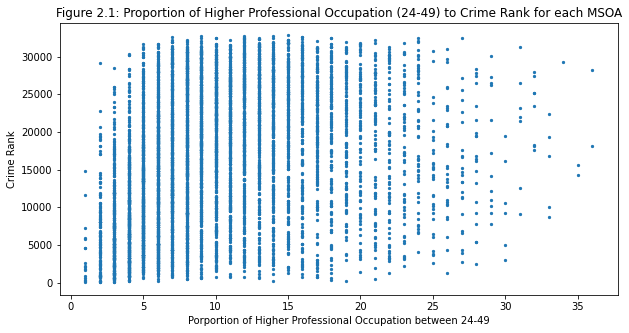

In [30]:
px2 = proportions_crime_agg.plot.scatter(x="higher_occupation_25_49", y = "Crime_Rank", s = 5, figsize=(10, 5), xlabel="Porportion of Higher Professional Occupation between 24-49", ylabel="Crime Rank", title="Figure 2.1: Proportion of Higher Professional Occupation (24-49) to Crime Rank for each MSOA")

/home/hamed/.pyenv/versions/emsx_3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='higher_occupation_25_49', ylabel='Crime_Rank'>

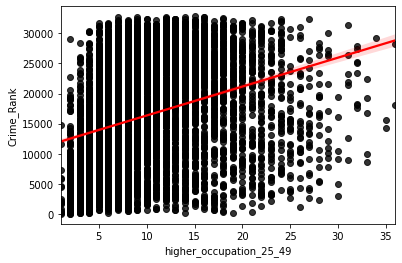

In [32]:
sns.regplot(proportions_crime_agg["higher_occupation_25_49"], proportions_crime_agg["Crime_Rank"], scatter_kws={"color": "black"}, line_kws={"color": "red"})

This is an interesting result though somewhat expected.

Looking at the regression line it seems that there is a positive correlation between the preportion of higher professional occupation aged 25 to 49 and the crime rank at the MSOA level.

The graphs shows that there higher the proportion of higher professional occupation in an MSOA the higher it will be on the crime rank. Which of course means that the MSOA will be less deprived and overall better. 

### Outliers
Let take a look at a few outliers in this result to see if they make sense.

In [36]:
# Top - Right extreme of the graph
# Highest Higher Occupation and also highest crime rank.
proportions_crime_agg.loc[(proportions_crime_agg["higher_occupation_25_49"] > 35) & (proportions_crime_agg["Crime_Rank"] > 25000)]

,higher_occupation_25_49,fulltime_students_16_24,Crime_Rank,Crime_Decile
MSOA,,,,
Oxford 003,36.0,87.0,28275.5,9.0


Huh ... Oxford again. Does make sense given Oxford is one of the richest and most affluent parts of the country. 

In [38]:
# Bottom - Left extreme of the graph
# Lowest Higher Occupation and also lowest crime rank.
proportions_crime_agg.loc[(proportions_crime_agg["higher_occupation_25_49"] < 2) & (proportions_crime_agg["Crime_Rank"] < 100)]

,higher_occupation_25_49,fulltime_students_16_24,Crime_Rank,Crime_Decile
MSOA,,,,
North East Lincolnshire 006,1.0,29.0,62.0,1.0


Winner here is North East Lincolnshire.
Lets look at NE Lincolnshire a little closer. For this I am going to use the "IoD2019 Interactive Dashboard - Local Authority Focus" website. See like here (https://app.powerbi.com/view?r=eyJrIjoiOTdjYzIyNTMtMTcxNi00YmQ2LWI1YzgtMTUyYzMxOWQ3NzQ2IiwidCI6ImJmMzQ2ODEwLTljN2QtNDNkZS1hODcyLTI0YTJlZjM5OTVhOCJ9)

Looking at NE Lincolnshire's LSOA range (006A to 006D) we can see that three out of the four LSOAs have an IMD decile rank of 1. The interactive map on the right side of the website also shows a congragation of deprived LSOAs including 006A in the area around Grimsby. The Wiki states that Grimsby use to be port to the world's largest fishing fleet around the mid-20th but has since suffered post-industrail decline and has fell sharply thereafter. (https://en.wikipedia.org/wiki/Grimsby)

### Four Quadrants of Depravation - High Crime or No High Crime ... that is the question.
Ignore that terrible title.
Lets pull in the Quadrants dataset and take a look at crime ranks in relation to them.

In [40]:
data = './data/census/mydata/census_quadrants_df.csv'
quadrants_df = pd.read_csv(data)

In [41]:
quadrants_df.head(3)

,MSOA,quadrant,higher_occupation_25_49,fulltime_students_16_24
0,Darlington 010,Q1,19.0,49.0
1,Northumberland 034,Q1,18.0,45.0
2,Northumberland 036,Q1,20.0,49.0


In [ ]:
# df = pd.merge(proportions_df, dod_merged, left_on="MSOA", right_on="MSOA11NM")
# # Will drop these two columns since they're just duplicates.
# df.drop(columns=["MSOA11NM", "MSOA11CD"], inplace=True)

In [45]:
# Dont need these two columns - they'll just be duplicates.
quadrants_df.drop(columns=["higher_occupation_25_49", "fulltime_students_16_24"], inplace=True)

In [46]:
Quadrants_proportion_agg = pd.merge(quadrants_df, proportions_crime_agg, left_on="MSOA", right_on="MSOA")

In [47]:
Quadrants_proportion_agg.head()

,MSOA,quadrant,higher_occupation_25_49,fulltime_students_16_24,Crime_Rank,Crime_Decile
0,Darlington 010,Q1,19.0,49.0,11031.0,4.0
1,Northumberland 034,Q1,18.0,45.0,32495.0,10.0
2,Northumberland 036,Q1,20.0,49.0,25116.5,8.0
3,Northumberland 039,Q1,18.0,48.0,32408.5,10.0
4,North Tyneside 016,Q1,19.0,42.0,17957.5,6.0


THE QUESITON GOES HERE!